In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # importing StandardScaler

# using GridSearchCV to find the best parameters for the models

from sklearn.model_selection import GridSearchCV # importing GridSearchCV

# Importing chosen models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# importing the train_test_split function
from sklearn.model_selection import train_test_split

# importing the accuracy_score function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

# importing VotingClassifier
from sklearn.ensemble import VotingClassifier

In [16]:
# Importing datasets


df_0 = pd.read_csv("../Data/df_0_with_dummy_encoding.csv")
df_1 = pd.read_csv("../Data/df_1_with_dummy_encoding.csv")

df_0.drop("id", axis=1, inplace=True)
df_1.drop("id", axis=1, inplace=True)

In [17]:
# Setting the models as objects

log_reg = LogisticRegression() # creating a LogisticRegression object
rf = RandomForestClassifier() # creating a RandomForestClassifier object
knn = KNeighborsClassifier() # creating a KNeighborsClassifier object
gauss_nb = GaussianNB()     # creating a GaussianNB object

In [18]:
# creating a function to split X and y of the dataset
def split_X_y(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y


def train_and_test(model, X_train, X_test, y_train, y_test): # defining the function
    model.fit(X_train, y_train) # training the model
    y_pred = model.predict(X_test) # predicting the test set

# function to print the accuracy score, confusion matrix and classification report and plotting the confusion matrix
def print_metrics(model, y_test, y_pred):
    print("Accuracy score: ", accuracy_score(y_test, y_pred)) # printing the accuracy score
    print("Confusion matrix: ", confusion_matrix(y_test, y_pred)) # printing the confusion matrix
    print("Classification report: ", classification_report(y_test, y_pred)) # printing the classification report
    print("F1-score: ", f1_score(y_test, y_pred)) # printing the f1-score
    print("Model: ", model) # printing the model
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["No Cardiovascular Disease", "Cardiovascular Disease"]).plot() # plotting the confusion matrix
    plt.show() # showing the plot


# creating a function to find the best parameters for the models
def find_best_params(model, params, X_train, y_train): 
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2) # creating a GridSearchCV object, params is the parameters to try, cv is the number of folds, n_jobs is the number of jobs to run in parallel, verbose is the verbosity level
    grid_search.fit(X_train, y_train) # fitting the model
    print("Model", model) #printing the model
    print("Best parameters: ", grid_search.best_params_) # printing the best parameters
    print("Best score: ", grid_search.best_score_) # printing the best score
    return grid_search.best_params_ # returning the best parameters

# creating a train and test split function that uses the best parameter
def train_and_test_with_best_params(model, X_train, X_test, y_train, y_test, best_params):
    model.set_params(**best_params) # setting the best parameters
    model.fit(X_train, y_train) # training the model
    y_pred = model.predict(X_test) # predicting the test set
    print_metrics(model, y_test, y_pred) # printing the metrics


In [19]:
X_0, y_0 = df_0.drop("cardio", axis=1), df_0["cardio"]
X_1, y_1 = df_1.drop("cardio", axis=1), df_1["cardio"]

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.33, random_state=42)

Training Model:  Logistic Regression For Dataset:  Dataset 0
TRAINED Model:  Logistic Regression For Dataset:  Dataset 0

Model:  Logistic Regression For Dataset:  Dataset 0
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model LogisticRegression()
Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.7045830802588215


Training Model:  Logistic Regression For Dataset:  Dataset 0 With Best Parameters
Accuracy score:  0.7037413762603927
Confusion matrix:  [[8978 2404]
 [4295 6935]]
Classification report:                precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.67     11230

    accuracy                           0.70     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.70      0.70     22612

F1-score:  0.6743157178277991
Model:  LogisticRegression(C=0.1)


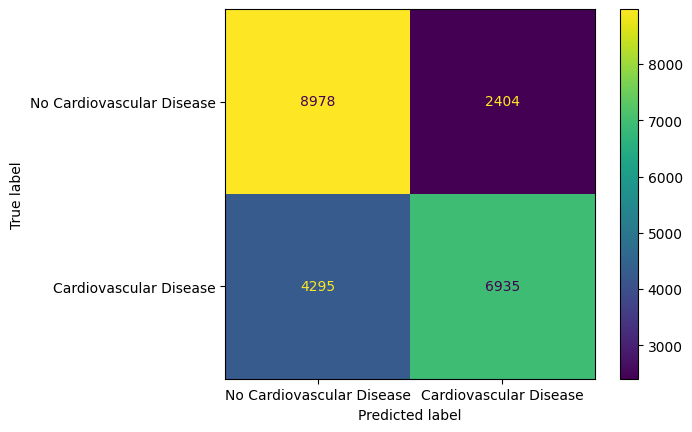

TRAINED Model:  Logistic Regression For Dataset:  Dataset 0 With Best Parameters



Best Model:
 Logistic Regression For Dataset:  Dataset 0
Best Score:
 0.7037413762603927
Best Parameters:
 {'C': 0.1, 'penalty': 'l2'}
Best Confusion Matrix:
 [[8978 2404]
 [4295 6935]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.67     11230

    accuracy                           0.70     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.70      0.70     22612



Training Model:  Random Forest For Dataset:  Dataset 0
TRAINED Model:  Random Forest For Dataset:  Dataset 0

Model:  Random Forest For Dataset:  Dataset 0
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model RandomForestClassifier()
Best parameters:  {'max_depth': 10, 'n_estimators': 400}
Best score:  0.7052148197207538


Training Model:  Random Forest F

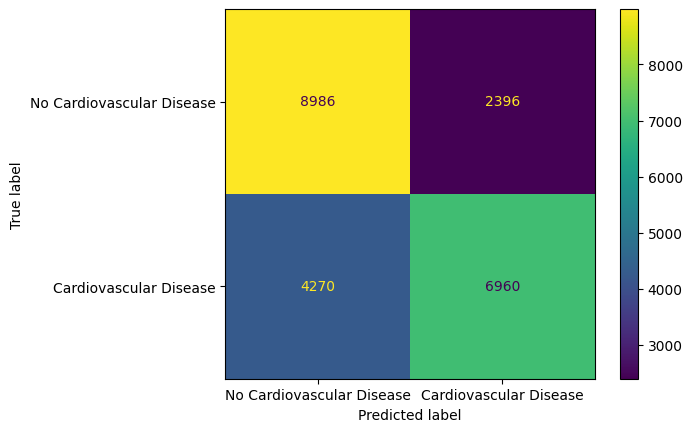

TRAINED Model:  Random Forest For Dataset:  Dataset 0 With Best Parameters



Best Model:
 Random Forest For Dataset:  Dataset 0
Best Score:
 0.7052007783477799
Best Parameters:
 {'max_depth': 10, 'n_estimators': 400}
Best Confusion Matrix:
 [[8986 2396]
 [4270 6960]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.68     11230

    accuracy                           0.71     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.71      0.70     22612



Training Model:  KNN For Dataset:  Dataset 0
TRAINED Model:  KNN For Dataset:  Dataset 0

Model:  KNN For Dataset:  Dataset 0
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Model KNeighborsClassifier()
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.6664197918427986


Training Model:  KNN For 

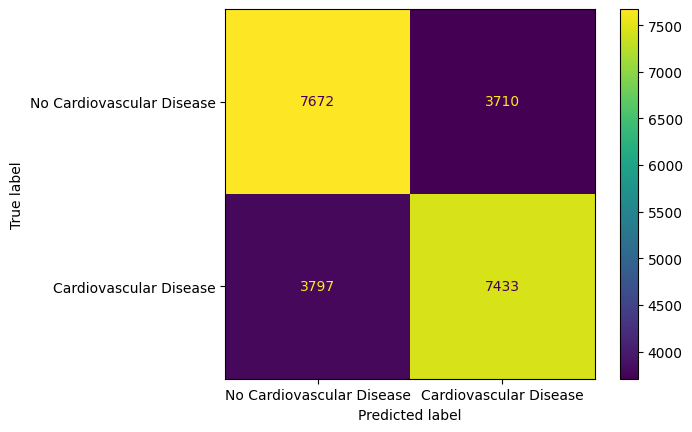

TRAINED Model:  KNN For Dataset:  Dataset 0 With Best Parameters



Best Model:
 KNN For Dataset:  Dataset 0
Best Score:
 0.6680081372722448
Best Parameters:
 {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Best Confusion Matrix:
 [[7672 3710]
 [3797 7433]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67     11382
           1       0.67      0.66      0.66     11230

    accuracy                           0.67     22612
   macro avg       0.67      0.67      0.67     22612
weighted avg       0.67      0.67      0.67     22612



Training Model:  Gaussian Naive Bayes For Dataset:  Dataset 0
TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 0

Model:  Gaussian Naive Bayes For Dataset:  Dataset 0
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model GaussianNB()
Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.6890082225679349


Training Model:  Gau

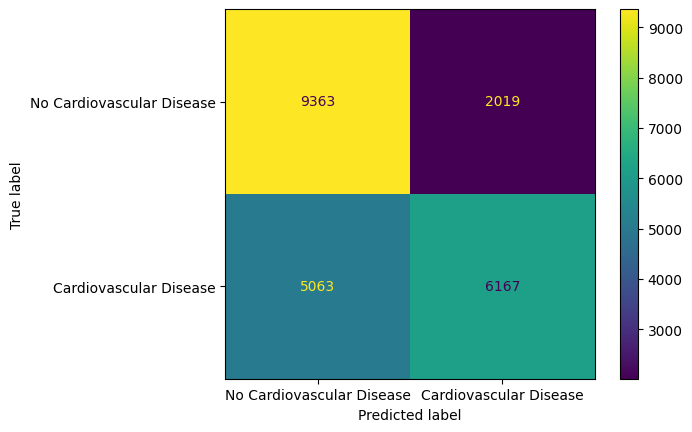

TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 0 With Best Parameters



Best Model:
 Gaussian Naive Bayes For Dataset:  Dataset 0
Best Score:
 0.6868034671855652
Best Parameters:
 {'var_smoothing': 1e-09}
Best Confusion Matrix:
 [[9363 2019]
 [5063 6167]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73     11382
           1       0.75      0.55      0.64     11230

    accuracy                           0.69     22612
   macro avg       0.70      0.69      0.68     22612
weighted avg       0.70      0.69      0.68     22612



Training Model:  Logistic Regression For Dataset:  Dataset 1
TRAINED Model:  Logistic Regression For Dataset:  Dataset 1

Model:  Logistic Regression For Dataset:  Dataset 1
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model LogisticRegression(C=0.1)
Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.7045830802588215


Training Model:  Logistic R

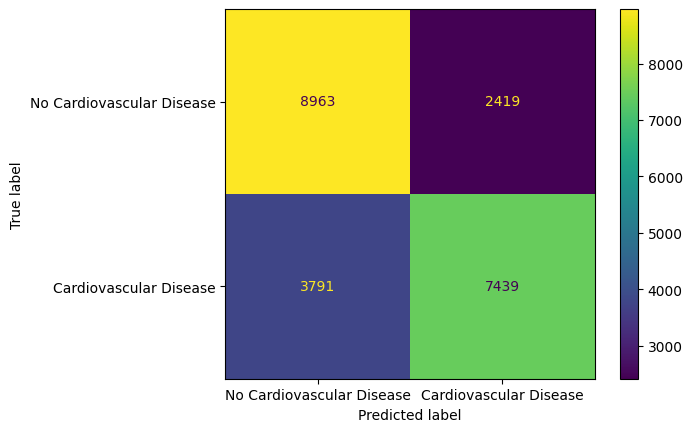

TRAINED Model:  Logistic Regression For Dataset:  Dataset 1 With Best Parameters



Best Model:
 Logistic Regression For Dataset:  Dataset 1
Best Score:
 0.7253670617371307
Best Parameters:
 {'C': 0.1, 'penalty': 'l2'}
Best Confusion Matrix:
 [[8963 2419]
 [3791 7439]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74     11382
           1       0.75      0.66      0.71     11230

    accuracy                           0.73     22612
   macro avg       0.73      0.72      0.72     22612
weighted avg       0.73      0.73      0.72     22612



Training Model:  Random Forest For Dataset:  Dataset 1
TRAINED Model:  Random Forest For Dataset:  Dataset 1

Model:  Random Forest For Dataset:  Dataset 1
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model RandomForestClassifier(max_depth=10, n_estimators=400)
Best parameters:  {'max_depth': 10, 'n_estimators': 200}
Best score:  0.7055851165354301


Tr

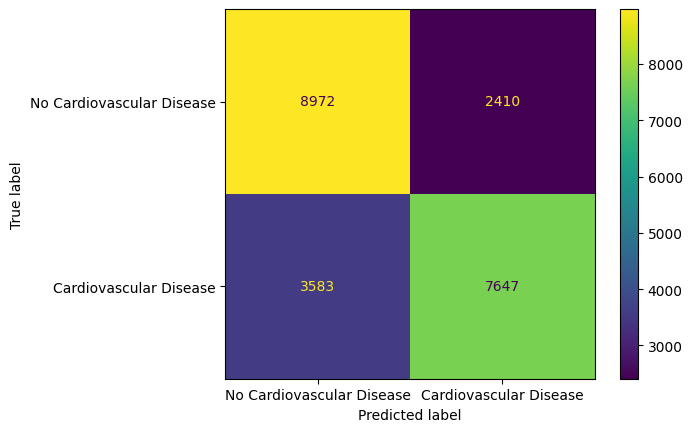

TRAINED Model:  Random Forest For Dataset:  Dataset 1 With Best Parameters



Best Model:
 Random Forest For Dataset:  Dataset 1
Best Score:
 0.7349637360693437
Best Parameters:
 {'max_depth': 10, 'n_estimators': 400}
Best Confusion Matrix:
 [[8972 2410]
 [3583 7647]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     11382
           1       0.76      0.68      0.72     11230

    accuracy                           0.73     22612
   macro avg       0.74      0.73      0.73     22612
weighted avg       0.74      0.73      0.73     22612



Training Model:  KNN For Dataset:  Dataset 1
TRAINED Model:  KNN For Dataset:  Dataset 1

Model:  KNN For Dataset:  Dataset 1
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Model KNeighborsClassifier(leaf_size=10)
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.6664197918427986


Training Mode

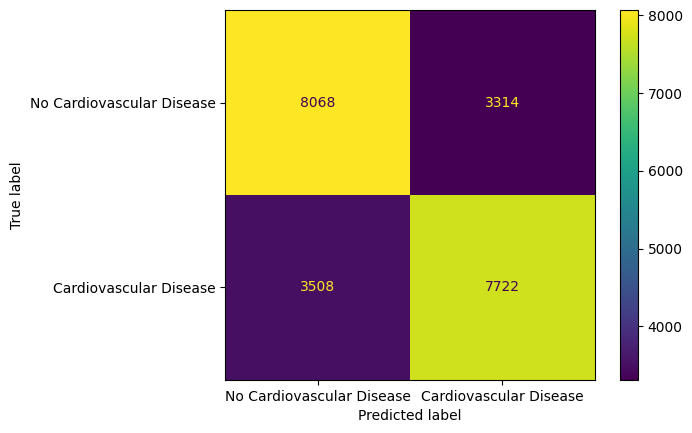

TRAINED Model:  KNN For Dataset:  Dataset 1 With Best Parameters



Best Model:
 KNN For Dataset:  Dataset 1
Best Score:
 0.6983017866619494
Best Parameters:
 {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Best Confusion Matrix:
 [[8068 3314]
 [3508 7722]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70     11382
           1       0.70      0.69      0.69     11230

    accuracy                           0.70     22612
   macro avg       0.70      0.70      0.70     22612
weighted avg       0.70      0.70      0.70     22612



Training Model:  Gaussian Naive Bayes For Dataset:  Dataset 1
TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 1

Model:  Gaussian Naive Bayes For Dataset:  Dataset 1
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model GaussianNB()
Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.6890082225679349


Training Model:  Gau

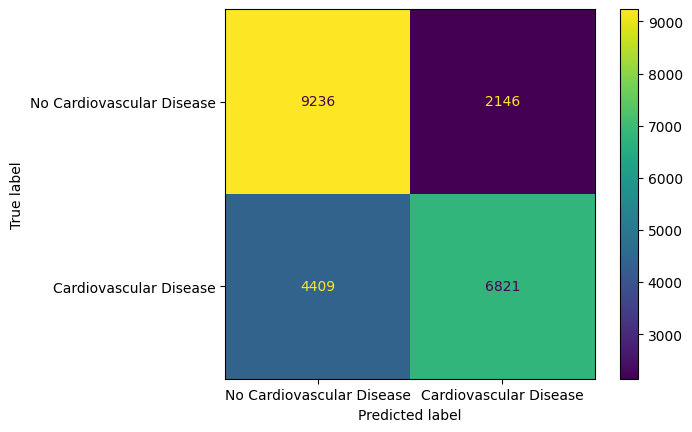

TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 1 With Best Parameters



Best Model:
 Gaussian Naive Bayes For Dataset:  Dataset 1
Best Score:
 0.7101096762780824
Best Parameters:
 {'var_smoothing': 1e-09}
Best Confusion Matrix:
 [[9236 2146]
 [4409 6821]]
Best Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74     11382
           1       0.76      0.61      0.68     11230

    accuracy                           0.71     22612
   macro avg       0.72      0.71      0.71     22612
weighted avg       0.72      0.71      0.71     22612





,Model,Score,Parameters,Predictions,Confusion Matrix,Classification Report,precision_score,recall_score,f1_score
0,Logistic Regression,0.703741,"{'C': 0.1, 'penalty': 'l2'}","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[[8978, 2404], [4295, 6935]]",precision recall f1-score ...,0.742585,0.617542,0.674316
1,Random Forest,0.705201,"{'max_depth': 10, 'n_estimators': 400}","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[[8986, 2396], [4270, 6960]]",precision recall f1-score ...,0.743908,0.619768,0.676188
2,KNN,0.668008,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[[7672, 3710], [3797, 7433]]",precision recall f1-score ...,0.667056,0.661888,0.664462
3,Gaussian Naive Bayes,0.686803,{'var_smoothing': 1e-09},"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[[9363, 2019], [5063, 6167]]",precision recall f1-score ...,0.753359,0.549154,0.635249
4,Logistic Regression,0.725367,"{'C': 0.1, 'penalty': 'l2'}","[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[[8963, 2419], [3791, 7439]]",precision recall f1-score ...,0.754616,0.662422,0.705520
5,Random Forest,0.734964,"{'max_depth': 10, 'n_estimators': 200}","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[[8972, 2410], [3583, 7647]]",precision recall f1-score ...,0.760366,0.680944,0.718467
6,KNN,0.698302,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[[8068, 3314], [3508, 7722]]",precision recall f1-score ...,0.699710,0.687622,0.693614
7,Gaussian Naive Bayes,0.710110,{'var_smoothing': 1e-09},"[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[[9236, 2146], [4409, 6821]]",precision recall f1-score ...,0.760678,0.607391,0.675447


In [20]:



X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

# Scaling the data
scaler = StandardScaler() # creating a StandardScaler object
X_0_train_scaled = scaler.fit_transform(X_0_train) # scaling the training set
X_0_test_scaled = scaler.transform(X_0_test) # scaling the test set

X_1_train_scaled = scaler.fit_transform(X_1_train) # scaling the training set
X_1_test_scaled = scaler.transform(X_1_test) # scaling the test set

# Creating a list of models
models = [log_reg, rf, knn, gauss_nb]

# Creating a list of model names
model_names = ["Logistic Regression", "Random Forest", "KNN", "Gaussian Naive Bayes"]

# Creating a list of scaled datasets

scaled_datasets = [(X_0_train_scaled, X_0_test_scaled, y_0_train, y_0_test), (X_1_train_scaled, X_1_test_scaled, y_1_train, y_1_test)]

# Creating a list of dataset names
dataset_names = ["Dataset 0", "Dataset 1"]

# Creating a list of parameters to try
params = [{"C": [0.1, 1, 10, 100, 1000], "penalty": ["l2"]}, # parameters for LogisticRegression
            {"n_estimators": [100, 200, 300, 400, 500], "max_depth": [5, 10, 15, 20, 25]}, # parameters for RandomForestClassifier
            {"n_neighbors": [3, 4, 5], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "leaf_size": [10, 20, 30]}, # parameters for KNeighborsClassifier
            {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}] # parameters for GaussianNB

# Creating a list of parameter names
param_names = ["Logistic Regression", "Random Forest", "KNN", "Gaussian Naive Bayes"]

# Creating a list of best parameters
best_params = []

# Creating a list of best scores
best_scores = []

# Creating a list of best models
best_models = []

# Creating a list of best model names
best_model_names = []

# Creating a list of best model scores
best_model_scores = []

# Creating a list of recall scores
best_model_recall_scores = []

# Creating a list of precision scores
best_model_precision_scores = []

# Creating a list of f1 scores
best_model_f1_scores = []

# Creating a list of best model predictions
best_model_preds = []

# Creating a list of best model confusion matrices
best_model_confusion_matrices = []

# Creating a list of best model classification reports
best_model_classification_reports = []

# Running the models on the datasets
for i in range(len(scaled_datasets)): # runs 2 times
    for j in range(len(models)): # runs 4 times
        print("Training Model: ", model_names[j], "For Dataset: ", dataset_names[i])
        train_and_test(models[j], scaled_datasets[i][0], scaled_datasets[i][1], scaled_datasets[i][2], scaled_datasets[i][3])
        print("TRAINED Model: ", model_names[j], "For Dataset: ", dataset_names[i])
        print("")

        # Finding the best parameters for the models
        print("Model: ", param_names[j], "For Dataset: ", dataset_names[i])
        best_params.append(find_best_params(models[j], params[j], scaled_datasets[0][0], scaled_datasets[0][2]))
        print("")
        print("")


        # Training the models with the best parameters
        print("Training Model: ", model_names[j], "For Dataset: ", dataset_names[i], "With Best Parameters")

        train_and_test_with_best_params(models[j], scaled_datasets[i][0], scaled_datasets[i][1], scaled_datasets[i][2], scaled_datasets[i][3], best_params[j])

        print("TRAINED Model: ", model_names[j], "For Dataset: ", dataset_names[i], "With Best Parameters")
        print("")

        # Saving the best models
        best_models.append(models[j]) # saving the best models
        best_model_names.append(model_names[j]) # saving the best model names
        best_model_scores.append(models[j].score(scaled_datasets[i][1], scaled_datasets[i][3])) # saving the best model scores
        best_model_recall_scores.append(recall_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        best_model_precision_scores.append(precision_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        best_model_f1_scores.append(f1_score(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        best_model_preds.append(models[j].predict(scaled_datasets[i][1]))
        best_model_confusion_matrices.append(confusion_matrix(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        best_model_classification_reports.append(classification_report(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        print("")
        print("")


        # Printing the best models
        print("Best Model:\n", model_names[j], "For Dataset: ", dataset_names[i])
        print("Best Score:\n", models[j].score(scaled_datasets[i][1], scaled_datasets[i][3]))
        print("Best Parameters:\n", best_params[j])
        print("Best Confusion Matrix:\n", confusion_matrix(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        print("Best Classification Report:\n", classification_report(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        print("")
        print("")

        



# Creating a dataframe of the best models
best_models_df = pd.DataFrame({"Model": best_model_names, "Score": best_model_scores, "Parameters": best_params, "Predictions": best_model_preds, "Confusion Matrix": best_model_confusion_matrices, "Classification Report": best_model_classification_reports, "precision_score": best_model_precision_scores,  "recall_score": best_model_recall_scores,"f1_score": best_model_f1_scores})

# Printing the dataframe
display(best_models_df)

# Saving the dataframe to a csv file





C:\Users\Agam\AppData\Local\Temp\ipykernel_4524\1445294302.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


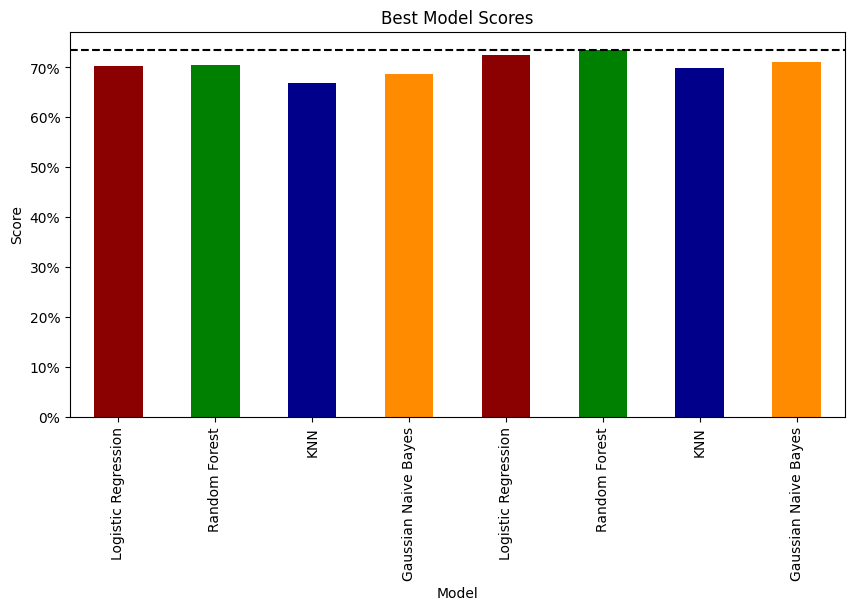

In [21]:
fig = best_models_df["Score"].plot(kind="bar", title="Best Model Scores", figsize=(10, 5), color=["darkred", "green", "darkblue", "darkorange"])
fig.set_xlabel("Model")
fig.set_ylabel("Score")
fig.set_xticklabels(best_models_df["Model"])
# setting y label as percentage
vals = fig.get_yticks()
fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# getting horizontal line
hline = fig.axhline(y=0.735, color="black", linestyle="--")

plt.show()

C:\Users\Agam\AppData\Local\Temp\ipykernel_4524\790634123.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


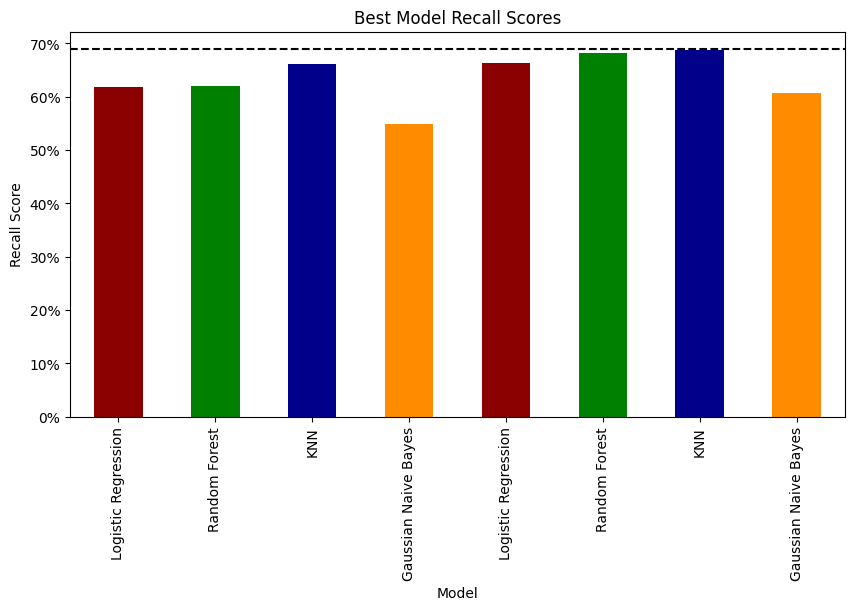

In [22]:
fig = best_models_df["recall_score"].plot(kind="bar", title="Best Model Recall Scores", figsize=(10, 5), color=["darkred", "green", "darkblue", "darkorange"])
fig.set_xlabel("Model")
fig.set_ylabel("Recall Score")
fig.set_xticklabels(best_models_df["Model"])
# setting y label as percentage
vals = fig.get_yticks()
fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# getting horizontal line
hline = fig.axhline(y=0.69, color="black", linestyle="--")

plt.show()